In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [506]:
stat = pd.read_csv('Статистика за 2018 год.csv', sep = ';')

In [508]:
stat.columns = ['number of steel details with defect', 'speed', 'type']

In [509]:
stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number of steel details with defect  237 non-null    int64  
 1   speed                                237 non-null    float64
 2   type                                 237 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


## Quick EDA 

In [510]:
# look at some statistics
stat.describe()

,number of steel details with defect,speed
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


In [511]:
# check the number of events for each steel grade
stat.type.value_counts()

A    139
B     98
Name: type, dtype: int64

In [512]:
# calculate the mean of steel details with defects for each steel grade
print('Mean number of steel details: {:.3f}'.format(stat.mean()[0]))
print('Mean number of steel details of Grade A: {:.3f}'.format(stat[stat['type'] == 'A'].mean()[0]))
print('Mean number of steel details of Grade B: {:.3f}'.format(stat[stat['type'] == 'B'].mean()[0]))

Mean number of steel details: 3.257
Mean number of steel details of Grade A: 3.180
Mean number of steel details of Grade B: 3.367


In [513]:
# calculate the variance of steel details with defects for each steel grade
print('Variance of steel details: {:.3f}'.format(stat.var()[0]))
print('Variance of steel details of Grade A: {:.3f}'.format(stat[stat['type'] == 'A'].var()[0]))
print('Variance of steel details of Grade B: {:.3f}'.format(stat[stat['type'] == 'B'].var()[0]))

Variance of steel details: 3.268
Variance of steel details of Grade A: 3.569
Variance of steel details of Grade B: 2.853


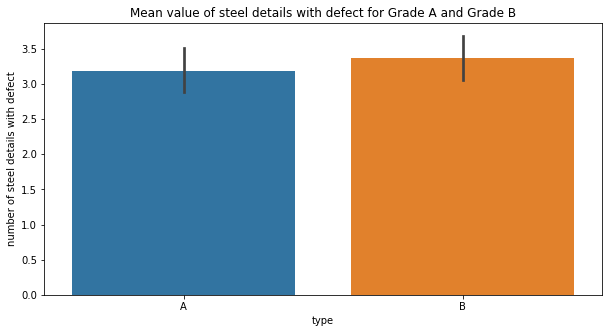

In [514]:
# visualize the mean of steel details with defects for each type
plt.figure(figsize = (10, 5))
sns.barplot(x = 'type', y = 'number of steel details with defect', data = stat, estimator = np.mean)
plt.title('Mean value of steel details with defect for Grade A and Grade B')
plt.show()

Text(0.5, 1.0, 'Distribution of Grade A')

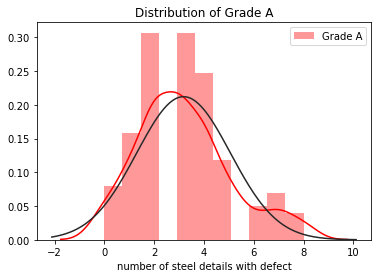

In [515]:
# check the distribution of Grade A
from scipy import stats
sns.distplot(stat[stat['type'] == 'A']['number of steel details with defect'], color = 'red', label = 'Grade A', fit = stats.norm)
plt.legend(loc = 'upper right')
plt.title('Distribution of Grade A')

Text(0.5, 1.0, 'Distribution of Grade B')

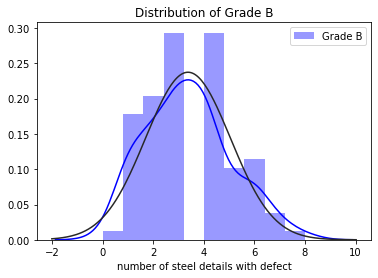

In [516]:
# check the distribution of Grade B
sns.distplot(stat[stat['type'] == 'B']['number of steel details with defect'], color = 'blue', label = 'Grade B', fit = stats.norm)
plt.legend(loc = 'upper right')
plt.title('Distribution of Grade B')

<h2> Approaches used for Hypothesis Tests

I have decided to test hypopthesis using two approaches. The first one is using z-test for proportions. The second one is Chi-squared for validation of my first approach. 

<h2> Testing hypothesis using proportions

<h3> Part 1

<h5> State Null and Alternative hypothesis for testing proportions:

***H$_{0}$*:** Proportion of steel details with defects > 3 for Grade A = Proportion of steel details with defects > 3 for grade B<br>***H$_{1}$*:** Proportion of steel details with defects > 3 for Grade A > Proportion of steel details with defects > 3 for Grade B
    
One-tailed test
    
Significance level = 0.05
    
 

In [517]:
# create two separate dataframes for Grade A and Grade B
s_A = stat[stat['type'] == 'A']
s_B = stat[stat['type'] == 'B']

# find proportions of steels details with defect which is greater than 3 for Grade A and Grade B
p_A = len(s_A[s_A['number of steel details with defect'] > 3]) / len(s_A)
p_B = len(s_B[s_B['number of steel details with defect'] > 3]) / len(s_B)
print('Proportion of steel details greater than 3 for Grade A is {:.4f} and Grade B is {:.4f}'.format(p_A, p_B))

# find number of samples of Grade A and Grade B
n_A = len(s_A)
n_B = len(s_B)
print('Number of steel samples of Grade A is {:.4f} and Grade B is {:.4f}'.format(n_A, n_B))

Proportion of steel details greater than 3 for Grade A is 0.3813 and Grade B is 0.4490
Number of steel samples of Grade A is 139.0000 and Grade B is 98.0000


 A: type_A = 139 	 details_A = 53 	 prop = 0.381294964028777
 B: type_B = 98 	 details_B = 44 	 prop = 0.4489795918367347


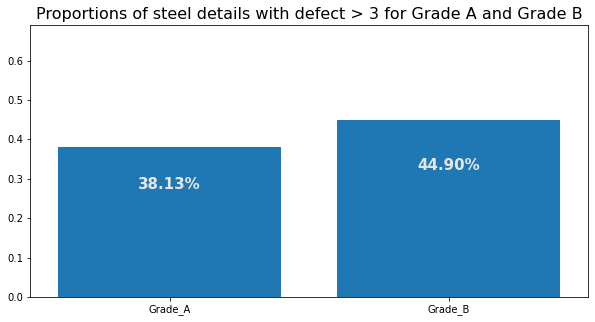

In [519]:
# create a graph with proportions for each steel grade
type_A = n_A
type_B = n_B
details_with_3_or_more_defects_A = details_A = len(s_A[s_A['number of steel details with defect'] > 3])
details_with_3_or_more_defects_B = details_B = len(s_B[s_B['number of steel details with defect'] > 3])

print(' {}: type_A = {} \t details_A = {} \t prop = {}'
      .format('A', type_A, details_A, details_A / type_A))

print(' {}: type_B = {} \t details_B = {} \t prop = {}'
      .format('B', type_B, details_B, details_B / type_B))


fig, ax = plt.subplots(figsize = (10, 5))

x = [0, 1]
y = [details_A / type_A, details_B / type_B]
ax.bar(x, y, align = 'center', width = 0.8)
ax.set_xticks(x)
ax.set_xticklabels(['Grade_A', 'Grade_B'])
plt.xlim(- 0.5, 1.5)
plt.ylim(0, 0.69)
for xx, yy in zip(x, y):
    ax.text(xx, yy * 0.7, '%0.2f%%' % (100 * yy),ha = 'center', va = 'bottom', fontdict = {'size': 15,'weight': 'bold','color': (0.9, 0.9, 0.9)})
    plt.title('Proportions of steel details with defect > 3 for Grade A and Grade B', fontdict = {'size' : 16})

<h4> Z-test of proportions using custom function

In [520]:
# create a function for z-test
def ztest_proportion_two_samples(x1, n1, x2, n2):
    p1 = x1 / n1
    p2 = x2 / n2    

    p = (x1 + x2) / (n1 + n2)
    standard_error = p * (1 - p) * (1 / n1 + 1 / n2)
    standard_error = np.sqrt(standard_error)
    
    z_stat = (p1 - p2) / standard_error
    p_value = 1 - stats.norm.cdf(abs(z_stat))
    return z_stat, p_value

z_stat, p_value = ztest_proportion_two_samples(details_A, type_A, details_B, type_B)
print(' z-stat = {z} \n p-value = {p}'.format(z = z_stat, p = p_value))

if p_value > 0.05:
    print(' Accept Null Hypothesis')
else:
    print(' Reject Null Hypothesis')

 z-stat = -1.0436016837317679 
 p-value = 0.1483348567978996
 Accept Null Hypothesis


<h4> Z-test using statsmodels library

In [521]:
# using statsmodels library
from statsmodels.stats.proportion import proportions_ztest
count = np.array([details_A, details_B])
nobs = np.array([type_A, type_B])
z_test, p_value = proportions_ztest(count, nobs, value = 0, alternative = 'smaller')
print(' z-stat = {z} \n p-value = {p}'.format(z = z_test, p = p_value))

if p_value > 0.05:
    print(' Accept Null Hypothesis')
else:
    print(' Reject Null Hypothesis')

 z-stat = -1.0436016837317679 
 p-value = 0.1483348567978996
 Accept Null Hypothesis


<h4> Conclusion

As calculated p-value is greater than significance level of 0.05 so we do not have enough evidence to reject the Null Hypothesis (H$_{0}$). We cannot conclude that more than 3 details with defects occur more often for steel Grade A than for steel Grade B. 

<h3> Part 2

<h5> State Null and Alternative hypothesis for testing proportions:

***H$_{0}$*:** Proportion of steel details with defects > 3 for speed of rolling  <= 4 m/s = Proportion of steel details with defects > 3 for speed of rolling  > 4 m/s<br>***H$_{1}$*:** Proportion of steel details with defects > 3 for speed of rolling > 4 m/s > Proportion of steel details with defects > 3 for speed of rolling  <= 4 m/s

    
One-tailed test
    
Significance level = 0.05

In [522]:
# create two separate dataframes for speed > 4 m/s and =< 4 m/s
df_speed_less_or_equal_4 = stat[stat['speed'] <= 4]
df_speed_greater_4 = stat[stat['speed'] > 4]

# find proportions of steels details with defect which is greater than 3 for speed <= 4 m/s and > 4 m/s
p_less_or_equal_4 = len(df_speed_less_or_equal_4[df_speed_less_or_equal_4['number of steel details with defect'] > 3]) / len(df_speed_less_or_equal_4)
p_greater_4 = len(df_speed_greater_4[df_speed_greater_4['number of steel details with defect'] > 3]) / len(df_speed_greater_4)
print('Proportion of steel details greater than 3 for speed of rolling <= 4 m/s is {:.4f} and for speed of rolling > 4 m/s is {:.4f}'.format(p_less_or_equal_4, p_greater_4))

# find number of samples for speed of rolling <= 4 m/s and > 4 m/s
n_less_or_equal_4 = len(df_speed_less_or_equal_4)
n_greater_4 = len(df_speed_greater_4)
print('Number of steel samples for speed of steel rolling <= 4 m/s is {:.4f} and for speed of steel rolling > 4 m/s is {:.4f}'.format(n_less_or_equal_4, n_greater_4))

Proportion of steel details greater than 3 for speed of rolling <= 4 m/s is 0.3966 and for speed of rolling > 4 m/s is 0.4134
Number of steel samples for speed of steel rolling <= 4 m/s is 58.0000 and for speed of steel rolling > 4 m/s is 179.0000


 <=4: speed_4 = 58 	 details_4 = 23 	 prop = 0.39655172413793105
 >4: speed_greater_4 = 179 	 details_greater_4 = 74 	 prop = 0.4134078212290503


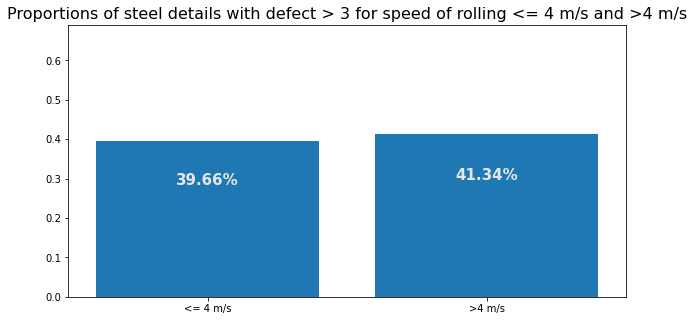

In [523]:
# create a graph with proportions for different speed of rolling
speed_4 = n_less_or_equal_4
speed_greater_4 = n_greater_4
details_4 = len(df_speed_less_or_equal_4[df_speed_less_or_equal_4['number of steel details with defect'] > 3])
details_greater_4 = len(df_speed_greater_4[df_speed_greater_4['number of steel details with defect'] > 3])

print(' {}: speed_4 = {} \t details_4 = {} \t prop = {}'
      .format('<=4', speed_4, details_4, details_4 / speed_4))

print(' {}: speed_greater_4 = {} \t details_greater_4 = {} \t prop = {}'
      .format('>4', speed_greater_4, details_greater_4, details_greater_4 / speed_greater_4))


fig, ax = plt.subplots(figsize = (10, 5))

x = [0,1]
y = [details_4 / speed_4, details_greater_4 / speed_greater_4]
ax.bar(x, y, align = 'center', width = 0.8)
ax.set_xticks(x)
ax.set_xticklabels(['<= 4 m/s', '>4 m/s'])
plt.xlim(- .5,1.5)
plt.ylim(0, .69)
for xx, yy in zip(x, y):
    ax.text(xx, yy * 0.7, '%0.2f%%'%(100 * yy),ha = 'center', va = 'bottom', fontdict = {'size': 15,'weight': 'bold','color': (0.9, 0.9, 0.9)})
    plt.title('Proportions of steel details with defect > 3 for speed of rolling <= 4 m/s and >4 m/s', fontdict = {'size' : 16})

<h4> Z-test of proportions using function

In [524]:
# create a function for z-test
def ztest_proportion_two_samples(x1, n1, x2, n2):
    p1 = x1 / n1
    p2 = x2 / n2    

    p = (x1 + x2) / (n1 + n2)
    standard_error = p * (1 - p) * (1 / n1 + 1 / n2)
    standard_error = np.sqrt(standard_error)
    
    z_stat = (p1 - p2) / standard_error
    p_value = 1 - stats.norm.cdf(abs(z_stat))
    return z_stat, p_value

z_stat, p_value = ztest_proportion_two_samples(details_4, speed_4, details_greater_4, speed_greater_4)
print(' z-stat = {z} \n p-value = {p}'.format(z = z_stat, p = p_value))

if p_value > 0.05:
    print(' Accept Null Hypothesis')
else:
    print(' Reject Null Hypothesis')

 z-stat = -0.22689337982109553 
 p-value = 0.4102533249796604
 Accept Null Hypothesis


<h4> Z-test using statsmodels library

In [525]:
# using statsmodels library
from statsmodels.stats.proportion import proportions_ztest
count = np.array([details_4, details_greater_4])
nobs = np.array([speed_4, speed_greater_4])
z,p = proportions_ztest(count, nobs, value = 0, alternative = 'smaller')
print(' z-stat = {z} \n p-value = {p}'.format(z = z, p = p))

if p_value > 0.05:
    print(' Accept Null Hypothesis')
else:
    print(' Reject Null Hypothesis')

 z-stat = -0.22689337982109553 
 p-value = 0.4102533249796604
 Accept Null Hypothesis


<h4> Conclusion

As calculated p-value is greater than significance level of 0.05 so we do not have enough evidence to reject the Null Hypothesis (H$_{0}$). We cannot conclude that more than 3 details with defects occur more often for speed of rolling greater than 4 m/s.

<h2> Testing hypothesis using Chi-squared

<h3> Part 1

<h5>State the Null and Alternative Hypothesis.<br>
H$_{0}$: There is no any connection between the frequency of occurrences of steel details with defect for Grade A and Grade B.<br>
H$_{1}$: There is a connection between the frequency of occurrences of steel details with defect for Grade A and Grade B.

Find the number of times (frequency) that number of defects is less than or equals to 3 and the number of defects is larger than 3 for steel Grade A and Grade B. 

In [526]:
# create frequency table for 2 types of steel grades
frequency_table = pd.DataFrame(columns = ['>3', '<=3', 'total'], index = ['A', 'B', 'total'])

In [527]:
# fill cells in the frequency table  
frequency_table['<=3']['A'] = len(stat[(stat['type'] == 'A') & (stat['number of steel details with defect'] <= 3)]['number of steel details with defect'])
frequency_table['<=3']['B'] = len(stat[(stat['type'] == 'B') & (stat['number of steel details with defect'] <= 3)]['number of steel details with defect'])

frequency_table['>3']['A'] = len(stat[(stat['type'] == 'A') & (stat['number of steel details with defect'] > 3)]['number of steel details with defect'])
frequency_table['>3']['B'] = len(stat[(stat['type'] == 'B') & (stat['number of steel details with defect'] > 3)]['number of steel details with defect'])

frequency_table['<=3']['total'] = np.sum(frequency_table['<=3'])
frequency_table['>3']['total'] = np.sum(frequency_table['>3'])

frequency_table['total']['A'] = frequency_table['<=3'][0] + frequency_table['>3'][0]
frequency_table['total']['B'] = frequency_table['<=3'][1] + frequency_table['>3'][1]

frequency_table['total'][2] = np.sum(frequency_table['total'])

In [528]:
frequency_table

,>3,<=3,total
A,53,86,139
B,44,54,98
total,97,140,237


In [529]:
from scipy.stats import chi2

def chi_squared_test(frequency_table, alpha = 0.05):
    
    deg_freedom = (frequency_table.shape[0] - 2) * (frequency_table.shape[1] - 2)
    print("Using {} degrees of freedom".format(deg_freedom))
    theta_hat = frequency_table['>3'].sum() / frequency_table['total'].sum()
    theta = theta_hat        
    
    #calculcate crirical value 
    chi_critical = chi2.isf(alpha, deg_freedom)
    
    #calculated expected values
    e_larger = frequency_table['total'] * theta
    e_less = frequency_table['total'] * (1 - theta)
    
    #create copy of dataframe
    df_test = frequency_table.copy()
    df_test['e_larger'] = e_larger
    df_test['e_less'] = e_less
    
    df_test['chi_larger'] = ((df_test['>3'] - df_test['e_larger'])**2  ) / df_test['e_larger'] 
    
    df_test['chi_less'] = ((df_test['<=3'] - df_test['e_less'])**2 ) / df_test['e_less']
    
    chi_test = df_test['chi_larger'].sum() + df_test['chi_less'].sum()
    
    if chi_test > chi_critical:
        print("Reject null hypothesis with {:.4f} > {:.4f}".format(chi_test, chi_critical))
    else:
        print("Accept null hypothesis with {:.4f} < {:.4f}".format(chi_test, chi_critical))
    
    return chi_test, df_test

In [530]:
chi_squared_test(frequency_table)

Using 1 degrees of freedom
Accept null hypothesis with 1.0891 < 3.8415


(1.0891044742877811,
        >3  <=3 total e_larger   e_less chi_larger  chi_less
 A      53   86   139  56.8903  82.1097   0.266028  0.184319
 B      44   54    98  40.1097  57.8903   0.377325  0.261432
 total  97  140   237       97      140          0         0)

##### **Conclusion:**

As calculated Chi-Squared value is equal to 1.0891 and its less than critical value of 3.8415 so we cannot reject the Null Hypothesis (H$_{0}$). We cannot conclude that there is a connection between frequency of occurrences and steel grades. 

<h3> Part 2

<h5>State the Null and Alternative Hypothesis:

***H$_{0}$*:** There is no any connection between speed of steel rolling and frequency of occurrences of steel details with defects.<br>
***H$_{1}$*:** There is a connection between speed of steel rolling and frequency of occurrences of steel details with defects.

In [531]:
# check the mean value of steel details with defects for less or equal to 4 m/s and more than 4 m/s 
print('Mean value of details with defects for speed of steel rolling <=4 m/s: {:.3f}'.format(stat[stat['speed'] <= 4].mean()[0]))
print('Mean value of details with defects for speed of steel rolling >4 m/s: {:.3f}'.format(stat[stat['speed'] > 4].mean()[0]))

print('----------------------------------------------------------------------------------')

# check the variance value of steel details with defects for less or equal to 4 m/s and more than 4 m/s 
print('Variance of details with defects for speed of steel rolling <=4 m/s: {:.3f}'.format(stat[stat['speed'] <= 4].var()[0]))
print('Variance value of details with defects for speed of steel rolling >4 m/s: {:.3f}'.format(stat[stat['speed'] > 4].var()[0]))

Mean value of details with defects for speed of steel rolling <=4 m/s: 3.069
Mean value of details with defects for speed of steel rolling >4 m/s: 3.318
----------------------------------------------------------------------------------
Variance of details with defects for speed of steel rolling <=4 m/s: 3.364
Variance value of details with defects for speed of steel rolling >4 m/s: 3.241


In [532]:
# create the frequency table 
frequency_table_1 = pd.DataFrame(columns = ['>3', '<=3', 'total'], index = ['>4', '<=4', 'total'])

In [533]:
frequency_table_1

,>3,<=3,total
>4,NaN,NaN,NaN
<=4,NaN,NaN,NaN
total,NaN,NaN,NaN


In [534]:
# fill cells in the frequency table table 
frequency_table_1['>3']['>4'] = len(stat[(stat['speed'] > 4) & (stat['number of steel details with defect'] > 3)]['speed'])

frequency_table_1['>3']['<=4'] = len(stat[(stat['speed'] > 4) & (stat['number of steel details with defect'] <= 3)]['speed'])

frequency_table_1['<=3']['>4'] = len(stat[(stat['speed'] <= 4) & (stat['number of steel details with defect'] > 3)]['speed'])
frequency_table_1['<=3']['<=4'] = len(stat[(stat['speed'] <= 4) & (stat['number of steel details with defect'] <= 3)]['speed'])

frequency_table_1['>3']['total'] = np.sum(frequency_table_1['>3'])
frequency_table_1['<=3']['total'] = np.sum(frequency_table_1['<=3'])

frequency_table_1['total']['>4'] = frequency_table_1['>3'][0] + frequency_table_1['<=3'][0]
frequency_table_1['total']['<=4'] = frequency_table_1['>3'][1] + frequency_table_1['<=3'][1]

frequency_table_1['total'][2] = np.sum(frequency_table_1['total'])

In [535]:
frequency_table_1

,>3,<=3,total
>4,74,23,97
<=4,105,35,140
total,179,58,237


In [536]:
from scipy.stats import chi2

def chi_squared_test(frequency_table, alpha = 0.05):
    
    deg_freedom = (frequency_table.shape[0] - 2) * (frequency_table.shape[1] - 2)
    print("Using {} degrees of freedom".format(deg_freedom))
    theta_hat = frequency_table['>3'].sum() / frequency_table['total'].sum()
    theta = theta_hat        
    
    #calculcate cutoff
    chi_critical = chi2.isf(alpha, deg_freedom)
    
    #calculated expected values:
    e_larger = frequency_table['total'] * theta
    e_less = frequency_table['total'] * (1 - theta)
    
    #create copy of dataframe
    df_test = frequency_table.copy()
    df_test['e_larger'] = e_larger
    df_test['e_less'] = e_less
    
    df_test['chi_larger'] = ((df_test['>3'] - df_test['e_larger'])**2  ) / df_test['e_larger'] 
    
    df_test['chi_less'] = ((df_test['<=3'] - df_test['e_less'])**2 ) / df_test['e_less']
    
    chi_test = df_test['chi_larger'].sum() + df_test['chi_less'].sum()
    
    if chi_test > chi_critical:
        print("Reject null hypothesis with {:.4f} > {:.4f}".format(chi_test, chi_critical))
    else:
        print("Accept null hypothesis with {:.4f} < {:.4f}".format(chi_test, chi_critical))
    
    return chi_test, df_test

In [537]:
chi_squared_test(frequency_table_1)

Using 1 degrees of freedom
Accept null hypothesis with 0.0515 < 3.8415


(0.05148060580663982,
         >3 <=3 total e_larger   e_less  chi_larger   chi_less
 >4      74  23    97  73.2616  23.7384  0.00744223  0.0229683
 <=4    105  35   140  105.738  34.2616   0.0051564  0.0159137
 total  179  58   237      179       58           0          0)

##### **Conclusion:**

As calculated Chi-Squared value is equal to 0.0515 and its less than critical value of 3.8415 so we scannot reject the Null Hypothesis (H$_{0}$). We cannot conclude that there is a connection between speed of steel rolling and the freqency of occurrences of steel details with defects. 